<h1 align='center'>Movie Recommendation System</h1>

# Data Preprocessing

## Importing and Exploring Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./archive/TMDB_movie_dataset_v11.csv')
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [3]:
df[['title', 'overview', 'keywords', 'genres',
    'vote_average', 'vote_count', 'popularity', 'revenue', 'original_language', 'spoken_languages']].head()

,title,overview,keywords,genres,vote_average,vote_count,popularity,revenue,original_language,spoken_languages
0,Inception,"Cobb, a skilled thief who commits corporate es...","rescue, mission, dream, airplane, paris, franc...","Action, Science Fiction, Adventure",8.364,34495,83.952,825532764,en,"English, French, Japanese, Swahili"
1,Interstellar,The adventures of a group of explorers who mak...,"rescue, future, spacecraft, race against time,...","Adventure, Drama, Science Fiction",8.417,32571,140.241,701729206,en,English
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,"joker, sadism, chaos, secret identity, crime f...","Drama, Action, Crime, Thriller",8.512,30619,130.643,1004558444,en,"English, Mandarin"
3,Avatar,"In the 22nd century, a paraplegic Marine is di...","future, society, culture clash, space travel, ...","Action, Adventure, Fantasy, Science Fiction",7.573,29815,79.932,2923706026,en,"English, Spanish"
4,The Avengers,When an unexpected enemy emerges and threatens...,"new york city, superhero, shield, based on com...","Science Fiction, Action, Adventure",7.710,29166,98.082,1518815515,en,"English, Hindi, Russian"


In [4]:
df1 = df[['title', 'overview', 'keywords', 'genres', 'original_language', 'spoken_languages',
    'vote_average', 'vote_count', 'popularity', 'revenue']]

In [155]:
print(df1.isnull().sum())
print(df1.shape)

title                    13
overview             269726
keywords             926845
genres               525035
original_language         0
spoken_languages     556383
vote_average              0
vote_count                0
popularity                0
revenue                   0
dtype: int64
(1252166, 10)


In [10]:
df1 = df1.drop_duplicates(subset=['title'], keep='first')
df1.shape

(1069315, 10)

In [11]:
df2 = df1.copy()
df2 = df2.dropna(subset=['title', 'overview', 'genres', 'keywords'])
df2['spoken_languages'] = df2['spoken_languages'].fillna('')

print(df2.isnull().sum())
print(df2.shape)

title                0
overview             0
keywords             0
genres               0
original_language    0
spoken_languages     0
vote_average         0
vote_count           0
popularity           0
revenue              0
dtype: int64
(199767, 10)


In [12]:
# Split comma-separated values
def split_comma_sep_values(column):
    return column.apply(
        lambda x: [item.strip() for item in x.split(',')]
        if pd.notnull(x) else []
    )

def split_space_sep_values(column):
    return column.apply(
        lambda x: [item.strip() for item in x.split(' ')]
        if pd.notnull(x) else []
    )

In [13]:
df2['genres'] = split_comma_sep_values(df2['genres'])
df2['keywords'] = split_comma_sep_values(df2['keywords'])
df2['spoken_languages'] = split_comma_sep_values(df2['spoken_languages'])
df2['original_language'] = split_comma_sep_values(df2['original_language'])

df2['title'] = split_space_sep_values(df2['title'])
df2['overview'] = split_space_sep_values(df2['overview'])

df2.head(3)

,title,overview,keywords,genres,original_language,spoken_languages,vote_average,vote_count,popularity,revenue
0,[Inception],"[Cobb,, a, skilled, thief, who, commits, corpo...","[rescue, mission, dream, airplane, paris, fran...","[Action, Science Fiction, Adventure]",[en],"[English, French, Japanese, Swahili]",8.364,34495,83.952,825532764
1,[Interstellar],"[The, adventures, of, a, group, of, explorers,...","[rescue, future, spacecraft, race against time...","[Adventure, Drama, Science Fiction]",[en],[English],8.417,32571,140.241,701729206
2,"[The, Dark, Knight]","[Batman, raises, the, stakes, in, his, war, on...","[joker, sadism, chaos, secret identity, crime ...","[Drama, Action, Crime, Thriller]",[en],"[English, Mandarin]",8.512,30619,130.643,1004558444


In [14]:
df2[df2['genres'].apply(len) > 5]['genres'].count()

435

In [15]:
df2[df2['keywords'].apply(len) > 20]['keywords'].count()

1326

In [16]:
df2[df2['original_language'].apply(len) != 1]['original_language'].count()

0

In [17]:
df2[df2['spoken_languages'].apply(len) > 5]['spoken_languages'].count()

241

In [18]:
df2[df2['title'].apply(len) > 10]['title'].count()

4146

In [19]:
df2[df2['overview'].apply(len) > 100]['overview'].count()

18569

In [20]:
df2 = df2[df2['genres'].apply(len) <= 5]
df2 = df2[df2['keywords'].apply(len) <= 20]
df2 = df2[df2['title'].apply(len) <= 10]
df2 = df2[df2['overview'].apply(len) <= 100]
df2 = df2[df2['spoken_languages'].apply(len) <= 5]

df2.shape

(175963, 10)

In [21]:
df2[df2['vote_average'] == 0.00]['vote_average'].count()

65091

In [22]:
df2[df2['vote_count'] == 0.00]['vote_count'].count()

65036

In [23]:
df2[df2['popularity'] == 0.00]['popularity'].count()

5447

In [24]:
df2[df2['revenue'] == 0.00]['revenue'].count()

163835

In [25]:
df2 = df2[df2['vote_average'] != 0]
df2 = df2[df2['vote_count'] != 0]
df2 = df2[df2['popularity'] != 0]

df2.shape

(110265, 10)

In [26]:
df2['weighted_avg_vote'] = df2['vote_average'] * df2['vote_count']
cols_to_log = ['weighted_avg_vote', 'popularity']
for col in cols_to_log:
    df2[col + '_log'] = np.log1p(df2[col].clip(lower=0))

df2 = df2.drop('revenue', axis=1)
df2.head(3)

,title,overview,keywords,genres,original_language,spoken_languages,vote_average,vote_count,popularity,weighted_avg_vote,weighted_avg_vote_log,popularity_log
0,[Inception],"[Cobb,, a, skilled, thief, who, commits, corpo...","[rescue, mission, dream, airplane, paris, fran...","[Action, Science Fiction, Adventure]",[en],"[English, French, Japanese, Swahili]",8.364,34495,83.952,288516.180,12.572510,4.442086
2,"[The, Dark, Knight]","[Batman, raises, the, stakes, in, his, war, on...","[joker, sadism, chaos, secret identity, crime ...","[Drama, Action, Crime, Thriller]",[en],"[English, Mandarin]",8.512,30619,130.643,260628.928,12.470857,4.880094
3,[Avatar],"[In, the, 22nd, century,, a, paraplegic, Marin...","[future, society, culture clash, space travel,...","[Action, Adventure, Fantasy, Science Fiction]",[en],"[English, Spanish]",7.573,29815,79.932,225788.995,12.327361,4.393609


Text(0.5, 1.0, 'QQ Plot of popularity_log')

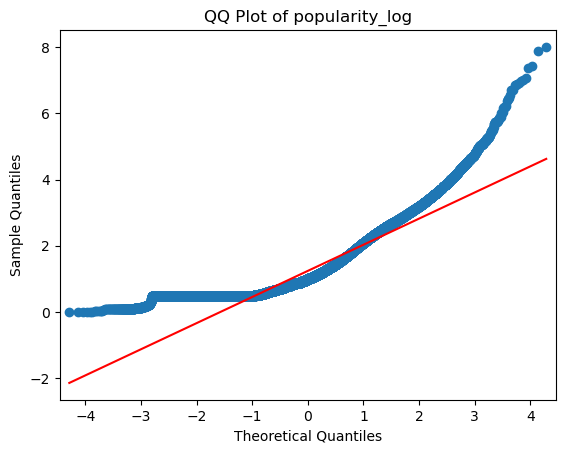

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df2['popularity_log'], line='s')
plt.title('QQ Plot of popularity_log')

In [28]:
df2[df2['popularity'] == 0]['popularity'].count()

0

Text(0.5, 1.0, 'QQ Plot of weighted_avg_vote_log')

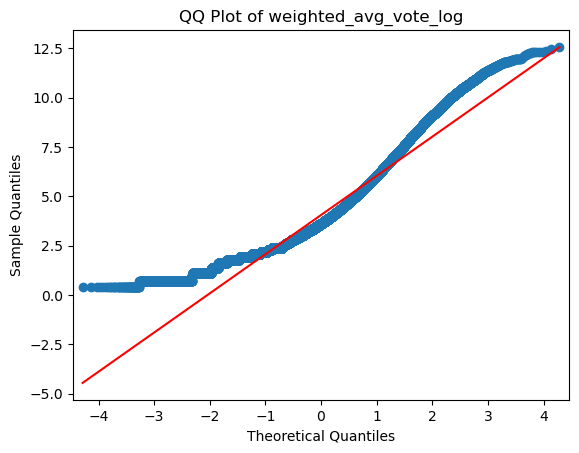

In [29]:
sm.qqplot(df2['weighted_avg_vote_log'], line='s')
plt.title('QQ Plot of weighted_avg_vote_log')

In [30]:
df2.shape

(110265, 12)

In [31]:
df2['overview'] = df2['overview'].apply(lambda x: ' '.join(x))
df2['title'] = df2['title'].apply(lambda x: ' '.join(x))
df2.head(3)

,title,overview,keywords,genres,original_language,spoken_languages,vote_average,vote_count,popularity,weighted_avg_vote,weighted_avg_vote_log,popularity_log
0,Inception,"Cobb, a skilled thief who commits corporate es...","[rescue, mission, dream, airplane, paris, fran...","[Action, Science Fiction, Adventure]",[en],"[English, French, Japanese, Swahili]",8.364,34495,83.952,288516.180,12.572510,4.442086
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,"[joker, sadism, chaos, secret identity, crime ...","[Drama, Action, Crime, Thriller]",[en],"[English, Mandarin]",8.512,30619,130.643,260628.928,12.470857,4.880094
3,Avatar,"In the 22nd century, a paraplegic Marine is di...","[future, society, culture clash, space travel,...","[Action, Adventure, Fantasy, Science Fiction]",[en],"[English, Spanish]",7.573,29815,79.932,225788.995,12.327361,4.393609


In [35]:
df2.to_csv('cleaned_data_v2.csv', index=False)